In [1]:
import numpy as np

from matplotlib import pyplot as plt
from snn.resonator import create_excitatory_resonator, test_frequency, create_excitatory_inhibitory_resonator


In [14]:


def custom_resonator_output_spikes(
        freq0,
        clk_freq=int(1.536 * (10 ** 6)) * 2,
        step=1/12_000,
        save_figure=False):
    my_resonator = create_excitatory_inhibitory_resonator(freq0=freq0, clk_freq=clk_freq)
    # plot_network(my_resonator)
    # my_resonator = create_excitatory_inhibitory_resonator(freq0=freq0, clk_freq=clk_pulse)
    log_neuron_potentials = []
    for i in log_neuron_potentials:
        my_resonator.log_membrane_potential(i)
    my_resonator.log_out_spikes(-1)
    # plot_network(my_resonator.network)
    start_freq = 0
    spectrum = 2 * freq0
    test_size = int(spectrum / step)
    spikes_neuron = my_resonator.neurons[-1]

    spikes_neuron.membrane_sample_max_window = np.zeros(1).astype('float32')
    test_frequency(
        my_resonator,
        start_freq=start_freq,
        step=step,
        test_size=test_size,
        clk_freq=clk_freq
    )

    for i in log_neuron_potentials:
        membrane_neuron = my_resonator.neurons[i]
        y_membrane = membrane_neuron.membrane_potential_graph()
        x = np.linspace(start_freq, start_freq + spectrum, len(y_membrane))
        plt.title(f'membrane potential f={freq0}, neuron={i}')
        plt.plot(x, y_membrane)
        plt.show()

    y_spikes = spikes_neuron.out_spikes[:spikes_neuron.index]

    # np.savez_compressed(f'output_{freq0}.npz',
    #                     membrane=y_membrane,
    #                     spikes=y_spikes)

    spikes_window_size = 5000
    y_spikes = np.convolve(y_spikes, np.ones(spikes_window_size, dtype=int), 'valid')
    x = np.linspace(start_freq, start_freq + spectrum, len(y_spikes))
    plt.title(f'spikes in window of {spikes_window_size} freq: {freq0}')
    if save_figure:
        # plt.savefig(f'../filters/clk_{clk_freq}/figures/f_{100}.PNG', bbox_inches='tight')
        plt.savefig('plot.png', dpi=300, bbox_inches='tight')
        plt.close()
    else:
        plt.plot(x, y_spikes)
        plt.show()

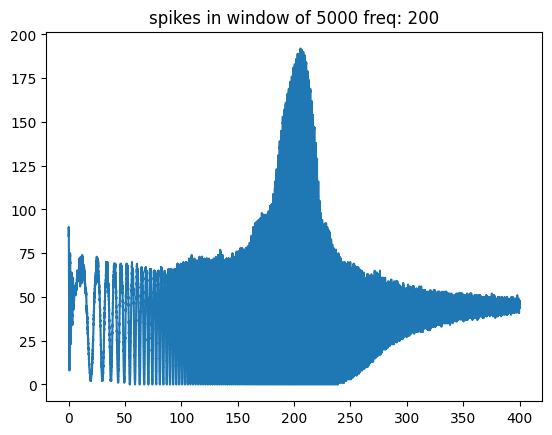

In [15]:
custom_resonator_output_spikes(freq0=200)

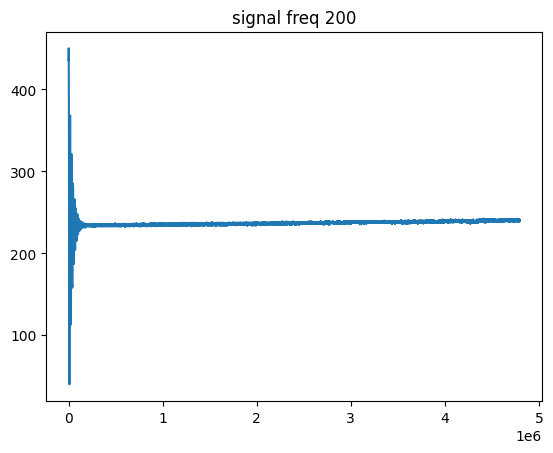

In [41]:
def plot_resonator_on_freq(signal_freq, steps, clk_freq=3072000):
    # my_resonator = create_excitatory_resonator(freq0=100, clk_freq=1536000)
    my_resonator = create_excitatory_resonator(freq0=200, clk_freq=3072000)

    my_resonator.log_out_spikes(-1)
    spikes_neuron = my_resonator.neurons[-1]
    spikes_neuron.membrane_sample_max_window = np.zeros(1).astype('float32')

    x = np.linspace(0, 400, 400 * steps)
    x = x * 2 * np.pi / clk_freq
    sine_wave = np.sin(signal_freq * x)

    my_resonator.input_full_data(sine_wave)

    spikes_window_size = 5000
    y_spikes = spikes_neuron.out_spikes[:spikes_neuron.index]
    y_spikes = np.convolve(y_spikes, np.ones(spikes_window_size, dtype=int), 'valid')
    plt.title(f'signal freq {signal_freq}')
    plt.plot(np.arange(len(y_spikes)), y_spikes)
    plt.show()

plot_resonator_on_freq(200, steps=12_000)

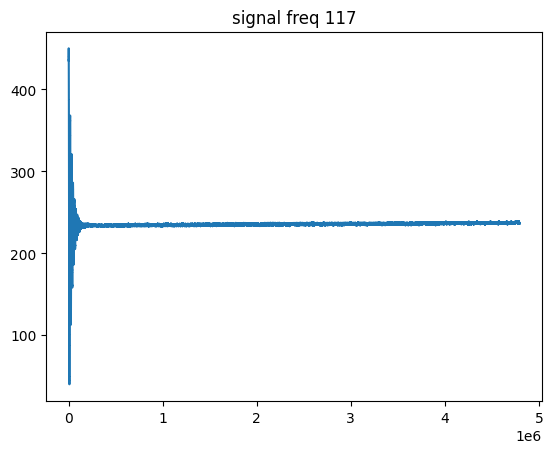

In [42]:
plot_resonator_on_freq(117, steps=12_000)

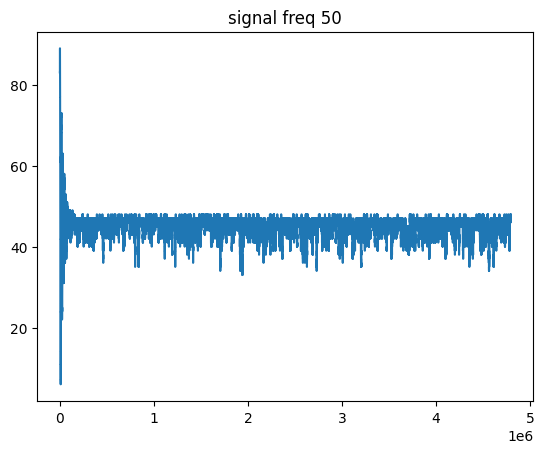

In [32]:
plot_resonator_on_freq(50, steps=12_000)

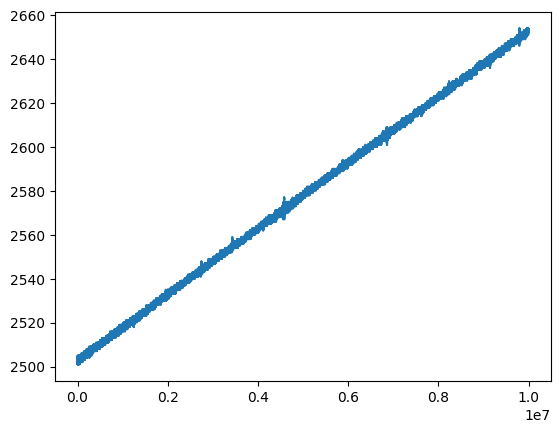

In [49]:
import json
with open('../output_spikes.txt', 'r') as f:
    data = f.read()
    data = json.loads(f'[{data[:-2]}]')
    data = np.array(data, dtype=np.int8)
    data = np.convolve(data, np.ones(5000, dtype=int), 'valid')
    plt.plot(data)


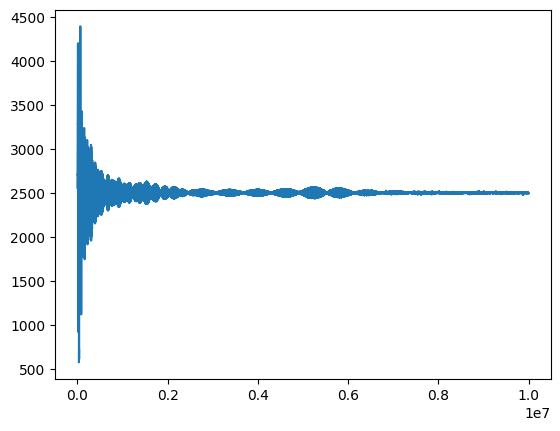

In [52]:
with open('../output_spikes_chirp.txt', 'r') as f:
    data = f.read()
    data = json.loads(f'[{data[:-2]}]')
    data = np.array(data, dtype=np.int8)
    data = np.convolve(data, np.ones(5000, dtype=int), 'valid')
    plt.plot(data)

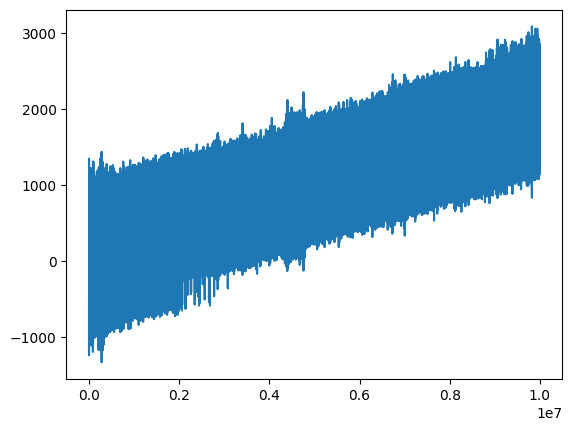

In [53]:
with open('../membrane_4.txt', 'r') as f:
    data = f.read()
    data = json.loads(f'[{data[:-2]}]')
    data = np.array(data, dtype=np.int32)
    # data = np.convolve(data, np.ones(5000, dtype=int), 'valid')
    plt.plot(data)

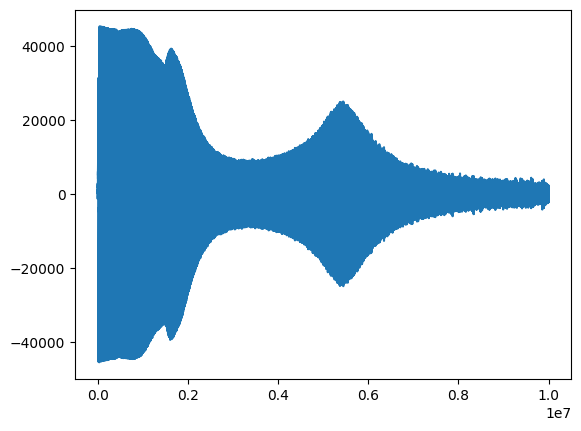

In [54]:
with open('../membrane_4_chrip.txt', 'r') as f:
    data = f.read()
    data = json.loads(f'[{data[:-2]}]')
    data = np.array(data, dtype=np.int32)
    # data = np.convolve(data, np.ones(5000, dtype=int), 'valid')
    plt.plot(data)